<a href="https://colab.research.google.com/github/jpiche0720/DS-Unit-2-Applied-Modeling/blob/master/module2-wrangle-ml-datasets/LS_DS_232_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Wrangle ML datasets

- [ ] Continue to clean and explore your data. 
- [ ] For the evaluation metric you chose, what score would you get just by guessing?
- [ ] Can you make a fast, first model that beats guessing?

**We recommend that you use your portfolio project dataset for all assignments this sprint.**

**But if you aren't ready yet, or you want more practice, then use the New York City property sales dataset for today's assignment.** Follow the instructions below, to just keep a subset for the Tribeca neighborhood, and remove outliers or dirty data. [Here's a video walkthrough](https://youtu.be/pPWFw8UtBVg?t=584) you can refer to if you get stuck or want hints!

- Data Source: [NYC OpenData: NYC Citywide Rolling Calendar Sales](https://data.cityofnewyork.us/dataset/NYC-Citywide-Rolling-Calendar-Sales/usep-8jbt)
- Glossary: [NYC Department of Finance: Rolling Sales Data](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page)

In [0]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
gdp_energy = pd.read_csv('Project.csv')

In [0]:
gdp_energy

,state,population_estimate,All industry total,Private industries,"Agriculture, forestry, fishing and hunting","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Durable goods manufacturing,...,Accommodation and food services,Other services (except government and government enterprises),Government and government enterprises,Natural resources and mining,Trade,Transportation and utilities,Manufacturing and information,Private goods-producing industries 2/,Private services-providing industries 3/,total natural gas consumption for electric power2002
0,Alabama2001,4480089.0,122449316,102670724,1988838,1379713,3572672,6199991,21192168,11255058,...,2833740,3330197,19778592,3368551,16685698,6805719,NaN,30760711,71910013,131531462.0
1,Alaska2001,642337.0,28420361,22500511,353602,4037335,412750,1430273,947374,111557,...,861506,602128,5919850,4390937,2366764,4109733,NaN,6768584,15731927,41364632.0
2,Arizona2001,5396255.0,171474249,148676367,1518311,1286682,3507169,10926930,22223337,19303002,...,5398755,3792374,22797883,2804993,23758529,7935741,NaN,35955259,112721108,145302961.0
3,Arkansas2001,2705927.0,70601352,61483503,2321139,409977,1836222,3311111,13887564,7023714,...,1664832,1857311,9117849,2731116,9644322,5214818,NaN,19929790,41553712,42744550.0
4,California2001,34871843.0,1384111202,1206974416,17706583,6427793,14641450,58705374,177808856,112985396,...,37611843,35601726,177136786,24134376,175194568,48228865,NaN,260648606,946325810,776884309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,Virginia2017,8463587.0,509372781,414966890,1719897,1466151,7522893,20268655,43169425,17775531,...,13786433,12695120,94405890,3186048,47512050,21115375,NaN,66624128,348342762,364054581.0
846,Washington2017,7423362.0,524814612,456518728,7656350,482080,4431510,22205763,59974985,45608754,...,15866217,10348531,68295884,8138430,70612303,19281336,NaN,90319178,366199551,73385589.0
847,West Virginia2017,1817004.0,73162915,61389797,313967,7585613,2229668,3384430,7583345,3325437,...,2437282,1477453,11773118,7899580,8443996,4450396,NaN,18867356,42522442,12112462.0
848,Wisconsin2017,5790186.0,321987743,286717491,4648503,1343442,5579614,13160387,60044175,34923330,...,7703776,6924251,35270252,5991945,37872281,15168276,NaN,79196507,207520984,128955025.0


In [0]:
gdp_energy = gdp_energy.drop(columns=['Manufacturing and information'])

In [0]:
gdp_energy['state'] = gdp_energy['state'].astype('string')
gdp_energy = gdp_energy.replace('(D)',np.NaN)

In [0]:
gdp_energy_nums = gdp_energy.select_dtypes(include='number')
gdp_energy_millions = gdp_energy_nums/1000000
gdp_energy_millions = gdp_energy_millions.round(3)
gdp_energy_population = gdp_energy['population_estimate']/1000000

obs = (gdp_energy['state'], gdp_energy_millions)

energy = pd.concat(obs,axis=1)
energy

,state,population_estimate,All industry total,Private industries,"Agriculture, forestry, fishing and hunting","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Durable goods manufacturing,...,"Arts, entertainment, and recreation",Accommodation and food services,Other services (except government and government enterprises),Government and government enterprises,Natural resources and mining,Trade,Transportation and utilities,Private goods-producing industries 2/,Private services-providing industries 3/,total natural gas consumption for electric power2002
0,Alabama2001,4.480,122.449,102.671,1.989,1.380,3.573,6.200,21.192,11.255,...,0.437,2.834,3.330,19.779,3.369,16.686,6.806,30.761,71.910,131.531
1,Alaska2001,0.642,28.420,22.501,0.354,4.037,0.413,1.430,0.947,0.112,...,0.125,0.862,0.602,5.920,4.391,2.367,4.110,6.769,15.732,41.365
2,Arizona2001,5.396,171.474,148.676,1.518,1.287,3.507,10.927,22.223,19.303,...,1.649,5.399,3.792,22.798,2.805,23.759,7.936,35.955,112.721,145.303
3,Arkansas2001,2.706,70.601,61.484,2.321,0.410,1.836,3.311,13.888,7.024,...,0.234,1.665,1.857,9.118,2.731,9.644,5.215,19.930,41.554,42.745
4,California2001,34.872,1384.111,1206.974,17.707,6.428,14.641,58.705,177.809,112.985,...,17.791,37.612,35.602,177.137,24.134,175.195,48.229,260.649,946.326,776.884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,Virginia2017,8.464,509.373,414.967,1.720,1.466,7.523,20.269,43.169,17.776,...,3.422,13.786,12.695,94.406,3.186,47.512,21.115,66.624,348.343,364.055
846,Washington2017,7.423,524.815,456.519,7.656,0.482,4.432,22.206,59.975,45.609,...,4.233,15.866,10.349,68.296,8.138,70.612,19.281,90.319,366.200,73.386
847,West Virginia2017,1.817,73.163,61.390,0.314,7.586,2.230,3.384,7.583,3.325,...,0.395,2.437,1.477,11.773,7.900,8.444,4.450,18.867,42.522,12.112
848,Wisconsin2017,5.790,321.988,286.717,4.649,1.343,5.580,13.160,60.044,34.923,...,2.355,7.704,6.924,35.270,5.992,37.872,15.168,79.197,207.521,128.955


In [0]:
energy['total natural gas consumption for electric power2002'] = energy['total natural gas consumption for electric power2002'].replace(0.0,np.NaN)

In [0]:
# drop outliers
energy = energy[energy['total natural gas consumption for electric power2002']<1000]

In [0]:
print(energy.shape)
energy.head()

(816, 36)


,state,population_estimate,All industry total,Private industries,"Agriculture, forestry, fishing and hunting","Mining, quarrying, and oil and gas extraction",Utilities,Construction,Manufacturing,Durable goods manufacturing,...,"Arts, entertainment, and recreation",Accommodation and food services,Other services (except government and government enterprises),Government and government enterprises,Natural resources and mining,Trade,Transportation and utilities,Private goods-producing industries 2/,Private services-providing industries 3/,total natural gas consumption for electric power2002
0,Alabama2001,4.480,122.449,102.671,1.989,1.380,3.573,6.200,21.192,11.255,...,0.437,2.834,3.330,19.779,3.369,16.686,6.806,30.761,71.910,131.531
1,Alaska2001,0.642,28.420,22.501,0.354,4.037,0.413,1.430,0.947,0.112,...,0.125,0.862,0.602,5.920,4.391,2.367,4.110,6.769,15.732,41.365
2,Arizona2001,5.396,171.474,148.676,1.518,1.287,3.507,10.927,22.223,19.303,...,1.649,5.399,3.792,22.798,2.805,23.759,7.936,35.955,112.721,145.303
3,Arkansas2001,2.706,70.601,61.484,2.321,0.410,1.836,3.311,13.888,7.024,...,0.234,1.665,1.857,9.118,2.731,9.644,5.215,19.930,41.554,42.745
4,California2001,34.872,1384.111,1206.974,17.707,6.428,14.641,58.705,177.809,112.985,...,17.791,37.612,35.602,177.137,24.134,175.195,48.229,260.649,946.326,776.884


In [0]:
energy.columns

Index(['state', 'population_estimate', 'All industry total',
       ' Private industries', '  Agriculture, forestry, fishing and hunting',
       '  Mining, quarrying, and oil and gas extraction', '  Utilities',
       '  Construction', '  Manufacturing', '   Durable goods manufacturing',
       '   Nondurable goods manufacturing', '  Wholesale trade',
       '  Retail trade', '  Transportation and warehousing', '  Information',
       '  Finance, insurance, real estate, rental, and leasing',
       '   Finance and insurance', '   Real estate and rental and leasing',
       '  Professional and business services',
       '   Professional, scientific, and technical services',
       '   Management of companies and enterprises',
       '   Administrative and support and waste management and remediation services',
       '  Educational services, health care, and social assistance',
       '   Educational services', '   Health care and social assistance',
       '  Arts, entertainment, recr

In [0]:
energy.columns= ['state',
 'population_estimate',
 'All industry total',
 'Private industries',
 'Agriculture, forestry, fishing and hunting',
 'Mining, quarrying, and oil and gas extraction',
 'Utilities',
 'Construction',
 'Manufacturing',
 'Durable goods manufacturing',
 'Nondurable goods manufacturing',
 'Wholesale trade',
 'Retail trade',
 'Transportation and warehousing',
 'Information',
 'Finance, insurance, real estate, rental, and leasing',
 'Finance and insurance',
 'Real estate and rental and leasing',
 'Professional and business services',
 'Professional, scientific, and technical services',
 'Management of companies and enterprises',
 'Administrative and support and waste management and remediation services',
 'Educational services, health care, and social assistance',
 'Educational services',
 'Health care and social assistance',
 'Arts, entertainment, recreation, accommodation, and food services',
 'Arts, entertainment, and recreation',
 'Accommodation and food services',
 'Other services (except government and government enterprises)',
 'Government and government enterprises',
 'Natural resources and mining',
 'Trade',
 'Transportation and utilities',
 'Private goods-producing industries 2/',
 'Private services-providing industries 3/',
 'total natural gas consumption for electric power2002']

In [0]:
energy['STATE'] = energy['state'].str[:-4]

/Users/jp/opt/anaconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
energy['YEAR'] = energy['state'].str[-4:]

/Users/jp/opt/anaconda3/envs/unit2/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
energy['Construction']

0       6.200
1       1.430
2      10.927
3       3.311
4      58.705
        ...  
845    20.269
846    22.206
847     3.384
848    13.160
849     1.994
Name: Construction, Length: 816, dtype: float64

# Finished

In [0]:
def csv_download_link(df, csv_file_name, delete_prompt=True):
    """Display a download link to load a data frame as csv from within a Jupyter notebook"""
    df.to_csv(csv_file_name, index=False)
    from IPython.display import FileLink, FileLinks
    display(FileLink(csv_file_name))
# Diplay download link:
csv_download_link(energy, 'Project_final.csv')

/Users/jp/DS-Unit-2-Applied-Modeling/module2-wrangle-ml-datasets/Project_final.csv

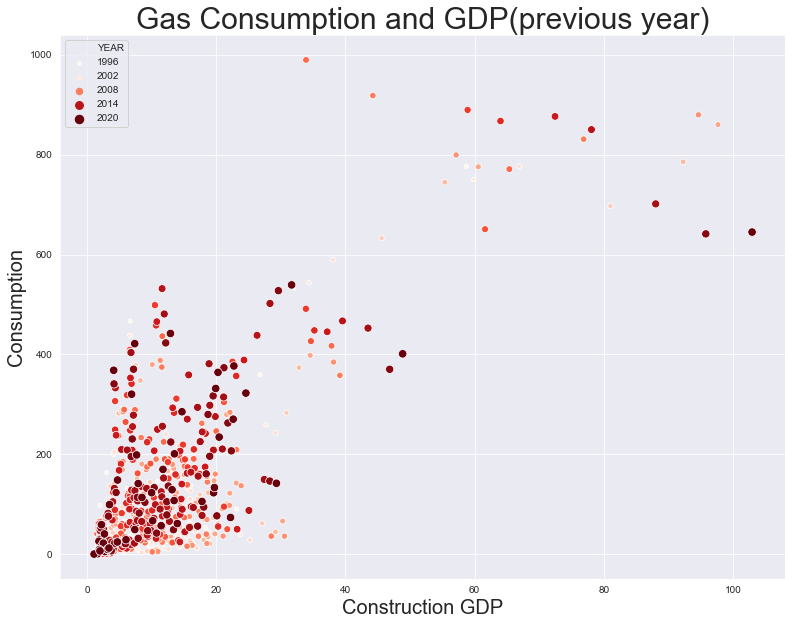

In [0]:

fig, ax = plt.subplots(figsize=(13,10))
fig = sns.set_style(style='darkgrid')
ax = sns.scatterplot(x='Construction',y='total natural gas consumption for electric power2002',
                     hue='YEAR',size='YEAR',data=energy,palette='Reds')

plt.title('Gas Consumption and GDP(previous year)',fontsize=30)
plt.xlabel('Construction GDP',fontsize=20)
plt.ylabel('Consumption',fontsize=20)


plt.show()

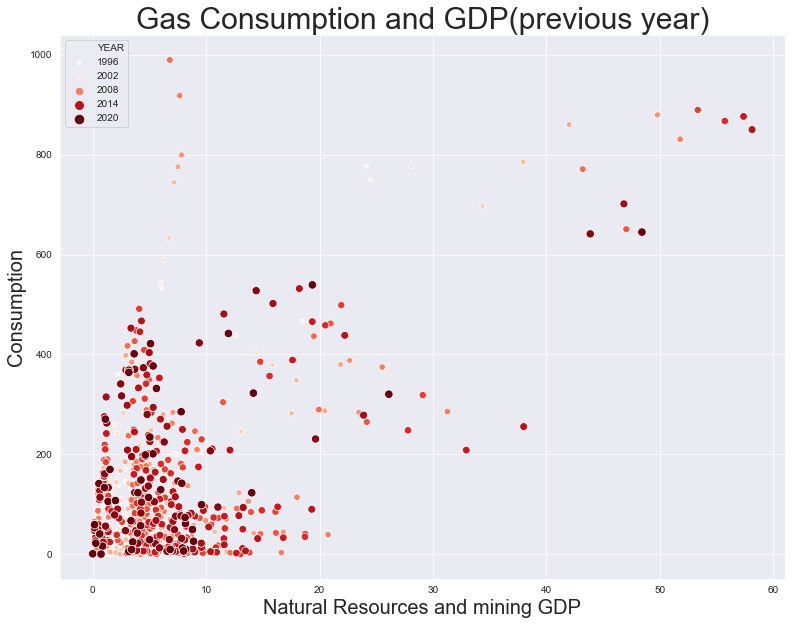

In [0]:

fig, ax = plt.subplots(figsize=(13,10))
fig = sns.set_style(style='darkgrid')
ax = sns.scatterplot(x='Natural resources and mining',y='total natural gas consumption for electric power2002',
                     hue='YEAR',size='YEAR',data=energy,palette='Reds')

plt.title('Gas Consumption and GDP(previous year)',fontsize=30)
plt.xlabel('Natural Resources and mining GDP',fontsize=20)
plt.ylabel('Consumption',fontsize=20)


plt.show()

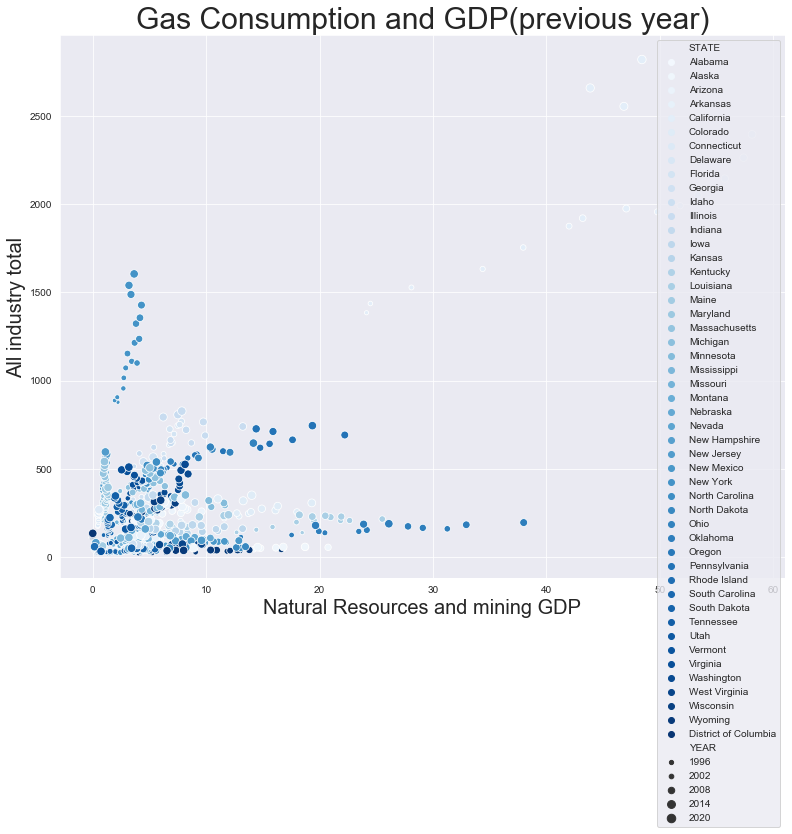

In [0]:
fig, ax = plt.subplots(figsize=(13,10))
fig = sns.set_style(style='darkgrid')
ax = sns.scatterplot(x='Natural resources and mining',y='All industry total',
                     hue='STATE',size='YEAR',data=energy,palette='Blues')

plt.title('Gas Consumption and GDP(previous year)',fontsize=30)
plt.xlabel('Natural Resources and mining GDP',fontsize=20)
plt.ylabel('All industry total',fontsize=20)


plt.show()

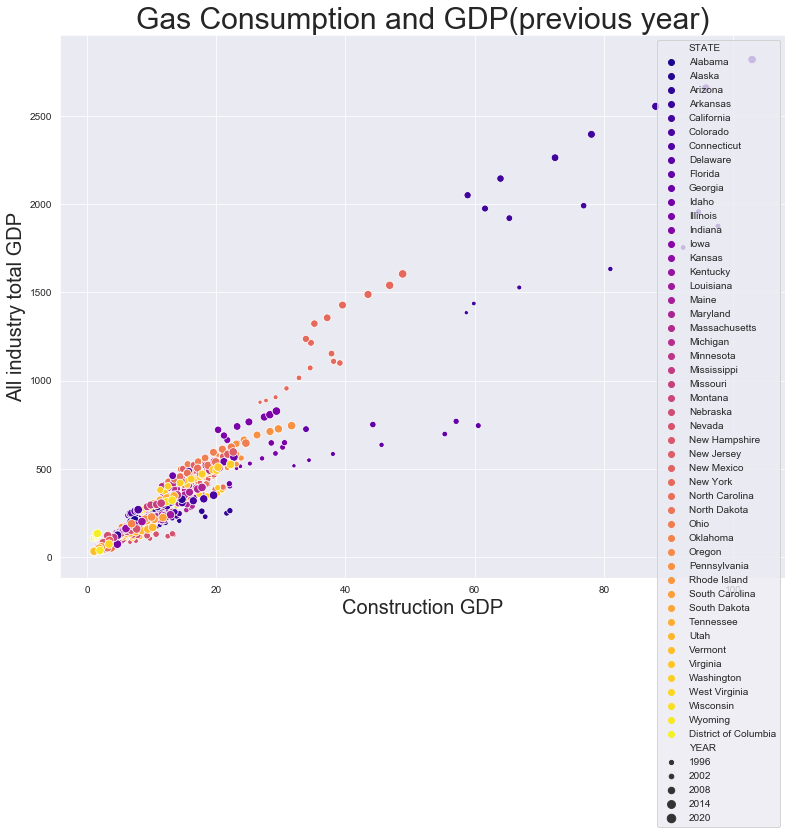

In [0]:
fig, ax = plt.subplots(figsize=(13,10))
fig = sns.set_style(style='darkgrid')
ax = sns.scatterplot(x='Construction',y='All industry total',
                     hue='STATE',size='YEAR',data=energy,palette='plasma')

plt.title('Gas Consumption and GDP(previous year)',fontsize=30)
plt.xlabel('Construction GDP',fontsize=20)
plt.ylabel('All industry total GDP',fontsize=20)


plt.show()

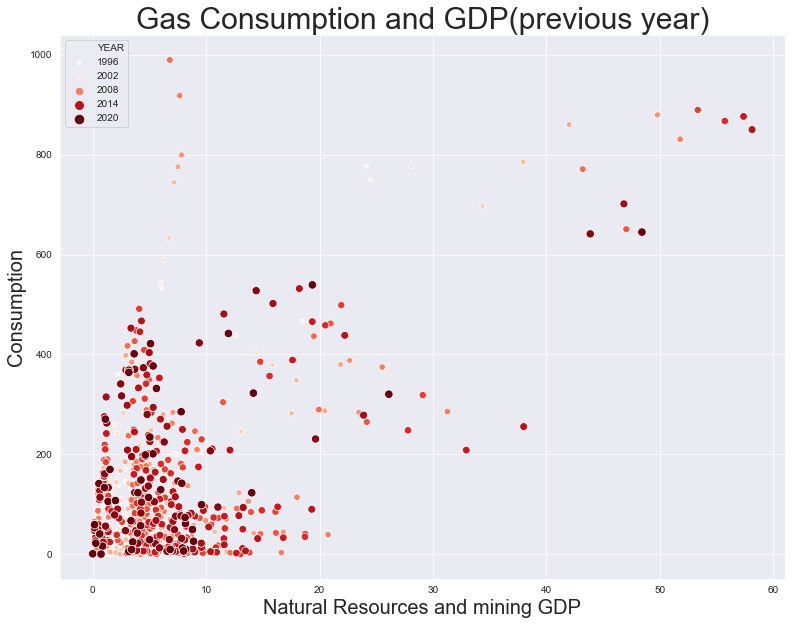

In [0]:
fig, ax = plt.subplots(figsize=(13,10))
fig = sns.set_style(style='darkgrid')
ax = sns.scatterplot(x='Natural resources and mining',y='total natural gas consumption for electric power2002',
                     hue='YEAR',size='YEAR',data=energy,palette='Reds')

plt.title('Gas Consumption and GDP(previous year)',fontsize=30)
plt.xlabel('Natural Resources and mining GDP',fontsize=20)
plt.ylabel('Consumption',fontsize=20)


plt.show()

# Modeling

In [0]:
train = energy.iloc[0:550,:]
val = energy.iloc[550:700,:]
test = energy.iloc[700:,:]
train.shape,val.shape,test.shape

((550, 38), (150, 38), (116, 38))

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

In [0]:
train.columns

Index(['state', 'population_estimate', 'population_estimate',
       'All industry total', 'Private industries',
       'Agriculture, forestry, fishing and hunting',
       'Mining, quarrying, and oil and gas extraction', 'Utilities',
       'Construction', 'Manufacturing', 'Durable goods manufacturing',
       'Nondurable goods manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing', 'Information',
       'Finance, insurance, real estate, rental, and leasing',
       'Finance and insurance', 'Real estate and rental and leasing',
       'Professional and business services',
       'Professional, scientific, and technical services',
       'Management of companies and enterprises',
       'Administrative and support and waste management and remediation services',
       'Educational services, health care, and social assistance',
       'Educational services', 'Health care and social assistance',
       'Arts, entertainment, recreation, accommodation, a

In [0]:
energy.columns= ['state','population_estimate','population_estimate','All industry total','Private industries','Agriculture, forestry, fishing and hunting','Mining, quarrying, and oil and gas extraction','Utilities','Construction','Manufacturing','Durable goods manufacturing','Nondurable goods manufacturing','Wholesale trade','Retail trade','Transportation and warehousing','Information','Finance, insurance, real estate, rental, and leasing','Finance and insurance','Real estate and rental and leasing','Professional and business services','Professional, scientific, and technical services','Management of companies and enterprises','Administrative and support and waste management and remediation services','Educational services, health care, and social assistance','Educational services','Health care and social assistance','Arts, entertainment, recreation, accommodation, and food services','Arts, entertainment, and recreation','Accommodation and food services','Other services (except government and government enterprises)','Government and government enterprises','Natural resources and mining','Trade','Transportation and utilities','Private goods-producing industries 2/','Private services-providing industries 3/','total natural gas consumption for electric power2002'

In [0]:
target = 'total natural gas consumption for electric power2002'
features = train.columns.drop(['state','All industry total','Private industries',target,'STATE','YEAR'])

In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_true = test[target]

# Mean Baseline

In [0]:
mean = gdp_energy_final['total natural gas consumption for electric power2002'].mean()
lis = [mean]
baseline_pred = lis*550

mean

120.08349142156862

In [0]:
mean_absolute_error(y_train,baseline_pred)

110.70730848484847

# Linear regression

In [0]:
pipeline = make_pipeline(StandardScaler(),
                         LinearRegression())

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_val)


print('Mean Absolute error:', mean_absolute_error(y_val,y_pred))

print('R2 Score:', r2_score(y_val,y_pred))

# Predict Test Set
y_pred = pipeline.predict(X_test)
print('Final Test Mean Absolute Error:', mean_absolute_error(y_true,y_pred))
print('Final R2 score:', r2_score(y_true,y_pred))

Mean Absolute error: 68.21234785327594
R2 Score: 0.6596904808713986
Final Test Mean Absolute Error: 79.87599854469352
Final R2 score: 0.4640194544655415


In [0]:
coefs= pipeline.named_steps['linearregression'].coef_

In [0]:
# SERIES
coeficients = pd.DataFrame(coefs,features)
coeficients.columns = ['COEFS'] 
coeficients

,COEFS
population_estimate,6.721082e+01
"Agriculture, forestry, fishing and hunting",-2.219013e+04
"Mining, quarrying, and oil and gas extraction",-2.803291e+04
Utilities,6.502674e+02
Construction,-7.151656e+04
Manufacturing,-2.508277e+05
Durable goods manufacturing,2.697867e+04
Nondurable goods manufacturing,2.085765e+04
Wholesale trade,-6.825138e+04
Retail trade,-7.203548e+04


# Ridge Regression

In [0]:
pipeline = make_pipeline(StandardScaler(),
                         Ridge(alpha=30))

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_val)


print('Mean Absolute error:', mean_absolute_error(y_val,y_pred))

print('R2 Score:', r2_score(y_val,y_pred))

# Predict Test Set
y_pred = pipeline.predict(X_test)
print('Final Test Mean Absolute Error:', mean_absolute_error(y_true,y_pred))
print('Final R2 score:',r2_score(y_true,y_pred))

Mean Absolute error: 65.78600469830867
R2 Score: 0.6409386589682976
Final Test Mean Absolute Error: 76.55269036554469
Final R2 score: 0.4764689781679933


# Random Froest Regressor

In [0]:
pipeline = make_pipeline(StandardScaler(),
                         RandomForestRegressor(n_estimators=200,
                                               criterion='mae',
                                               max_depth=10,
                                               min_samples_split=5,
                                               random_state=42,
                                               n_jobs=-1))



pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_val)

# Validate Training Set
print('Mean Absolute error:', mean_absolute_error(y_val,y_pred))

print('R2 Score:', r2_score(y_val,y_pred))

# Predict Test Set
y_pred = pipeline.predict(X_test)
print('Final Test Mean Absolute Error:', mean_absolute_error(y_true,y_pred))
print('Final Test R2 score:', r2_score(y_true,y_pred))

Mean Absolute error: 45.20274394999999
R2 Score: 0.7962385736408453
Final Test Mean Absolute Error: 68.08377842672415
Final Test R2 score: 0.5576850144522856


In [0]:
model = pipeline.named_steps['randomforestregressor']
feature_importance = model.feature_importances_

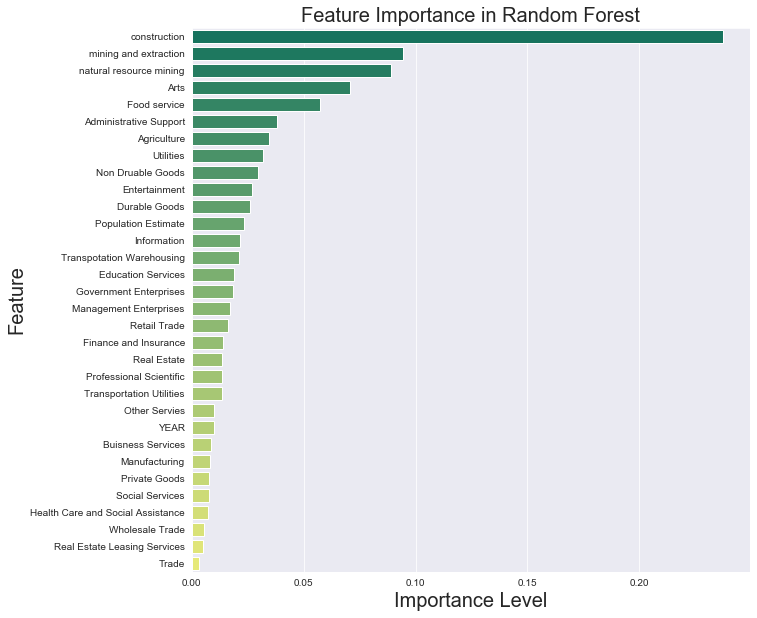

In [0]:
names = ['construction','mining and extraction','natural resource mining',
         'Arts','Food service','Administrative Support','Agriculture',
         'Utilities','Non Druable Goods','Entertainment','Durable Goods',
         'Population Estimate','Information','Transpotation Warehousing', 
         'Education Services','Government Enterprises','Management Enterprises',
         'Retail Trade','Finance and Insurance', 'Real Estate', 'Professional Scientific',
         'Transportation Utilities','Other Servies','YEAR','Buisness Services',
         'Manufacturing','Private Goods','Social Services','Health Care and Social Assistance',
         'Wholesale Trade', 'Real Estate Leasing Services','Trade','Private-providing service']

importances = pd.DataFrame({'Feature':X_train.columns,
                            'Importance':feature_importance})


                            
importances = importances.sort_values(by='Importance',ascending=False)

importances = importances.reset_index()

importances['Feature']= pd.Series(names)

importances
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x='Importance',y='Feature',data=importances,orient='h',palette='summer')
plt.title('Feature Importance in Random Forest',fontsize=20)
plt.xlabel('Importance Level',fontsize=20)
plt.ylabel('Feature',fontsize=20)

plt.show()

In [0]:
baseline_prediction = 110.70730848484847
diff = baseline_prediction-mean_absolute_error(y_true,y_pred)
print('The random forest model has increased accuracy by:',diff,'billion cubic feet','\n','from a baseline of:',baseline_prediction)

The random forest model has increased accuracy by: 42.62353005812432 billion cubic feet 
 from a baseline of: 110.70730848484847
